# Handson 08: Ruído

## Ruído AWGN 
O ruido AWGN (Additive White Gaussian Noise) é um modelo de ruido usado para simulações de efeito em muitos processos aleatórios que ocorrem na natureza.

- **Aditive** :  Porque é adicionado a qualquer ruído que possa ser intrínseco ao sinal;

- ** White ** : Refere-se à possuir uma potência uniforme em toda a banda de freqüência do sinal;

- **Gaussian** : Possui uma distribuição normal;

- **Noise **: Ruído.
---
Usa-se a distribuição normal para simular a maioria dos fenomenos naturais, por convergir a um determinado valor. Para gerar um ruído AWGN deve-se seguir as seguintes etapas:

**1)** Conhecida a SNR, mede-se a potência do vetor x(t) pela seguinte equação:
$$ E_{s} = \frac {1} {N} \sum_{0}^{N-1} \left | x(i)  \right |^2 $$
Para L= length(x) Comprimento de x(t);

**2)** Converte uma dada SNR em dB para escala linear, gerando um vetor ruído usando a equação abaixo: 

- Real:
$$Ruído_{real} =  randn(1,L)\cdot \sqrt{\left (\frac{E_{s}}{SNR_{linear}}\right )}$$ 

- Complexo:
$$Ruído_{complexo} =   [randn(1,L)+ j \cdot randn(1,L) ] \cdot \sqrt{\left (\frac{E_{s}}{2 \cdot SNR_{linear}}\right )} $$ 

**3)** Realiza a soma do sinal x(t) com o ruido 

$$ Y(t)= x(t)+ Ruído(t) $$

O script abaixo mostra uma implementação de ruido para um sinal qualquer $x(t)$:

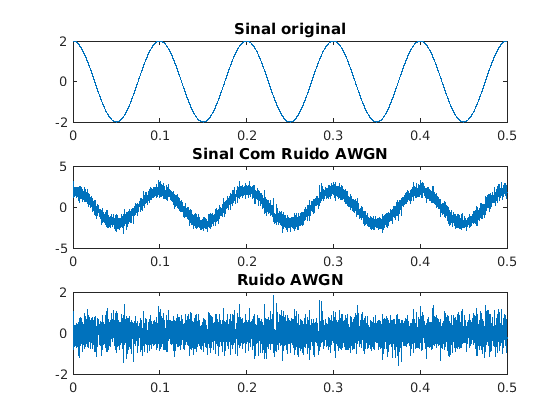

In [2]:
% AWGN_Real.m
clc;clear all;close all;
%% Parâmetros
SNR_dB= 10;                                         % Determina o valor da SNR em dB
t=0:0.0001:0.5;                                     % Eixo do tempo
x=2*cos(2*pi*10*t);                                 % Sinal qualquer x(t)

%% Montagem do vetor Ruído Real
L=length(x);                                        % Calcula o comprimento de x
Es= sum(abs(x).^2)/L;                               % Calcula a potência do sinal
SNR= 10^(SNR_dB/10);                                % Calcula a SNR linear
D=Es/SNR;                                           % Calcula a densidade espectral do ruído
noiseSigma = sqrt(D);                               % Derivação padrao para ruído AWGN real
n = noiseSigma* randn(1,L);                         % Ruido real calculado 
y =x+n;                                             % Sinal Ruidoso

%% Plotting
subplot(3,1,1)
plot(t,x);
title('Sinal original')
subplot(3,1,2)
plot(t,y);
title('Sinal Com Ruido AWGN')
subplot(3,1,3)
plot(t,n);
title('Ruido AWGN')

Simularemos também para um sinal complexo, gerando também um ruído complexo segundo a equação dada acima:

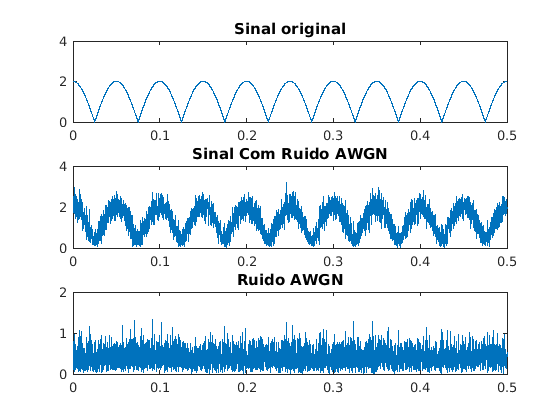

In [3]:
% AWGN_Complexo.m
clc;clear all;close all;
%% Parâmetros
SNR_dB= 10;                                         % Determina o valor da SNR em dB
t=0:0.0001:0.5;                                     % Eixo do tempo
x=2*cos(2*pi*10*t)+i*0.2*cos(2*pi*10*t);            % Sinal qualquer x(t)

%% Montagem do vetor Ruído Complexo
L=length(x);                                        % Calcula o comprimento de x
Es= sum(abs(x).^2)/L;                               % Calcula a potência do sinal
SNR= 10^(SNR_dB/10);                                % Calcula a SNR linear
D=Es/SNR;                                           % Calcula a densidade espectral do ruído
noiseSigma= sqrt(D/2);                              % Derivação padrao para ruído AWGN complexo
n = noiseSigma*(randn(1,L)+i* randn(1,L));         % Ruido complexo calculado 
y =x+n;                                             % Sinal Ruidoso

%% Plotting
subplot(3,1,1)
plot(t,abs(x));
title('Sinal original')
subplot(3,1,2)
plot(t,abs(y));
title('Sinal Com Ruido AWGN')
subplot(3,1,3)
plot(t,abs(n));
title('Ruido AWGN')

------
**Desafio:** Estimar a SNR (dB) de um sinal $x=cos(2 \pi f_{m} t)$ real e um complexo do arquivo DesafioR_08.mat  e DesafioC_08.mat, respectivamente a partir do sinal recebido $y(t)$, da amplitude do sinal $A_{m}$ e sua frequência 
$f_{m}$.

**Obs:**O sinal complexo é dado como a soma de dois cossenos de amplitudes diferentes, sendo um complexo e outro real.

**a) Cálculo do valor da SNR.**

**b) Justificar o porquê de ao colocar um ruído de snr = 10, na medição é comum ter valores de snr próximos ao original.**